Importing the necessary modules

In [1]:
import pandas as pd
import datetime as dt
import matplotlib

Loading in the dataset

In [2]:
df = pd.read_csv('strong.csv')
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes,RPE
0,2016-03-07 21:34:52,Back Stronglifts,Lat Pulldown,1,70.0,5,0.0,0,NaN,NaN,NaN
1,2016-03-07 21:34:52,Back Stronglifts,Lat Pulldown,2,70.0,5,0.0,0,NaN,NaN,NaN
2,2016-03-07 21:34:52,Back Stronglifts,Lat Pulldown,3,90.0,5,0.0,0,NaN,NaN,NaN
3,2016-03-07 21:34:52,Back Stronglifts,Lat Pulldown,4,90.0,5,0.0,0,NaN,NaN,NaN
4,2016-03-07 21:34:52,Back Stronglifts,Lat Pulldown,5,90.0,5,0.0,0,NaN,NaN,NaN


Splitting the first column into somthin more usefull

In [3]:
df[['Date','Time']] = df.Date.str.split(" ",expand=True,)
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes,RPE,Time
0,2016-03-07,Back Stronglifts,Lat Pulldown,1,70.0,5,0.0,0,NaN,NaN,NaN,21:34:52
1,2016-03-07,Back Stronglifts,Lat Pulldown,2,70.0,5,0.0,0,NaN,NaN,NaN,21:34:52
2,2016-03-07,Back Stronglifts,Lat Pulldown,3,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52
3,2016-03-07,Back Stronglifts,Lat Pulldown,4,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52
4,2016-03-07,Back Stronglifts,Lat Pulldown,5,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52


In [4]:
df.dtypes

Date              object
Workout Name      object
Exercise Name     object
Set Order          int64
Weight           float64
Reps               int64
Distance         float64
Seconds            int64
Notes             object
Workout Notes    float64
RPE              float64
Time              object
dtype: object

In [5]:
df['Date'] =  pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Workout Name             object
Exercise Name            object
Set Order                 int64
Weight                  float64
Reps                      int64
Distance                float64
Seconds                   int64
Notes                    object
Workout Notes           float64
RPE                     float64
Time                     object
dtype: object

In [6]:
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes,RPE,Time
0,2016-03-07,Back Stronglifts,Lat Pulldown,1,70.0,5,0.0,0,NaN,NaN,NaN,21:34:52
1,2016-03-07,Back Stronglifts,Lat Pulldown,2,70.0,5,0.0,0,NaN,NaN,NaN,21:34:52
2,2016-03-07,Back Stronglifts,Lat Pulldown,3,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52
3,2016-03-07,Back Stronglifts,Lat Pulldown,4,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52
4,2016-03-07,Back Stronglifts,Lat Pulldown,5,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52


In [7]:
df['Day of the week'] = df['Date'].dt.weekday_name
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes,RPE,Time,Day of the week
0,2016-03-07,Back Stronglifts,Lat Pulldown,1,70.0,5,0.0,0,NaN,NaN,NaN,21:34:52,Monday
1,2016-03-07,Back Stronglifts,Lat Pulldown,2,70.0,5,0.0,0,NaN,NaN,NaN,21:34:52,Monday
2,2016-03-07,Back Stronglifts,Lat Pulldown,3,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52,Monday
3,2016-03-07,Back Stronglifts,Lat Pulldown,4,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52,Monday
4,2016-03-07,Back Stronglifts,Lat Pulldown,5,90.0,5,0.0,0,NaN,NaN,NaN,21:34:52,Monday


In [8]:
pivot = df.pivot_table(index = 'Day of the week', aggfunc = 'count')
pivot

,Date,Distance,Exercise Name,Notes,RPE,Reps,Seconds,Set Order,Time,Weight,Workout Name,Workout Notes
Day of the week,,,,,,,,,,,,
Friday,155,155,155,9,0,155,155,155,155,155,155,0
Monday,344,344,344,17,0,344,344,344,344,344,344,0
Saturday,337,337,337,14,0,337,337,337,337,337,337,0
Sunday,409,409,409,22,0,409,409,409,409,409,409,0
Thursday,210,210,210,15,0,210,210,210,210,210,210,0
Tuesday,201,201,201,14,0,201,201,201,201,201,201,0
Wednesday,205,205,205,9,0,205,205,205,205,205,205,0


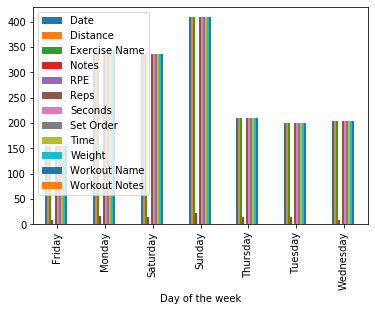

In [17]:
pivot.plot.bar()